# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_pickle('male_test.pkl')
# dft = pd.read_pickle('male_train_prototype.pkl')
from scipy.stats import pearsonr
from sklearn.decomposition import FastICA
from scipy import linalg
from datetime import datetime
import scipy.io
# %matplotlib notebook

In [2]:
# !ls ICA/

In [3]:
subjects_deltas = 'ICA/PcaIca_subject_deltas_transpose_steve_norm_deconf_pass2.mat'
# subjects_ages = 'ICA/PcaIca_subject_transpose_steve_norm_ages_pass2.mat'
modalities_deltas = 'ICA/PcaIca_features_deltas_10000_x_100_x_0.9_deltas_deconf_pass2.mat'
# modalities_ages = 'ICA/PcaIca_features_deltas_10000_x_100_x_0.9_ages_pass2.mat'

# Analyse Subject-Direction Deltas

In [4]:
mat = scipy.io.loadmat(subjects_deltas)
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'None', 'icaA', 'icaS', 'pcaS', 'pcaU', 'pcaV', '__function_workspace__'])


In [5]:
icaA = mat['icaA']
icaS = mat['icaS']
pcaS = mat['pcaS']
pcaU = mat['pcaU']
pcaV = mat['pcaV']
print("Shapes: ")
print("icaA", icaA.shape)
print("icaS", icaS.shape)
print("pcaS", pcaS.shape)
print("pcaU", pcaU.shape)
print("pcaV", pcaV.shape)

Shapes: 
icaA (2, 2)
icaS (2, 4365)
pcaS (57, 57)
pcaU (57, 57)
pcaV (4365, 57)


# Notes

ICA on IDPs, including dimensionality estimation (commented out as this section was run once then saved to disk below)

X = pcaU pcaS pcaV'    

pcaV' = icaA icaS   

X = pcaU pcaS icaA icaS = pcaicaU icaS   

pcaicaU = pcaU pcaS icaA

```octave
pcaicaU = pcaU(:,1:JJ) * pcaS(1:JJ,1:JJ) * icaA; 
```

In [6]:
J = icaA.shape[0]
pcaicaU = pcaU[:,:J].dot(pcaS[:J, :J]).dot(icaA)
print(pcaicaU.shape)

(57, 2)


In [7]:
modalities = df.modality.to_list()

dict_keys(['__header__', '__version__', '__globals__', 'None', 'icaA', 'icaS', 'pcaS', 'pcaU', 'pcaV', '__function_workspace__'])
Shapes: 
icaA (2, 2)
icaS (2, 4365)
pcaS (57, 57)
pcaU (57, 57)
pcaV (4365, 57)


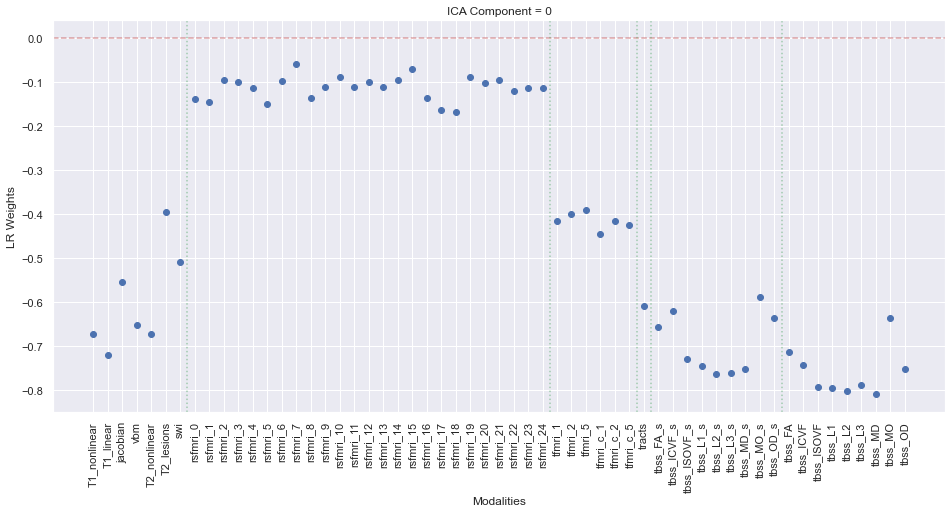

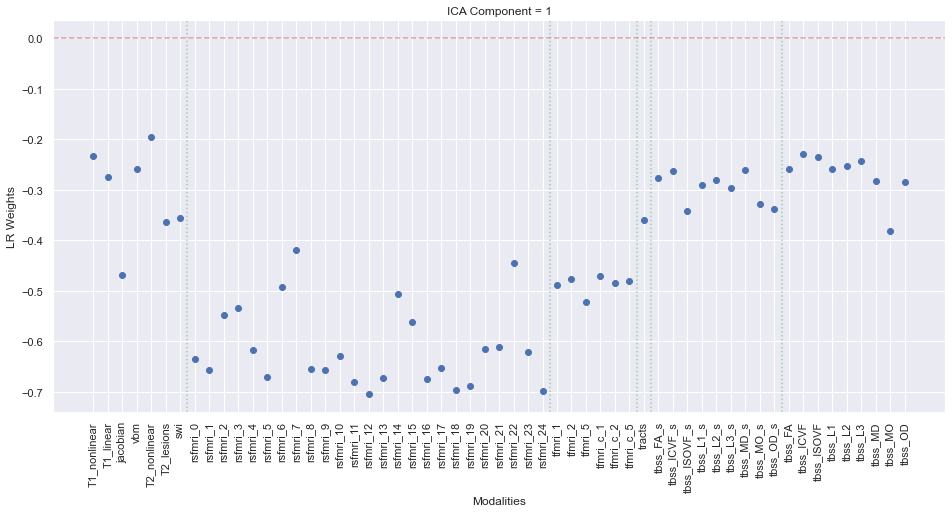

In [8]:
mat = scipy.io.loadmat(subjects_deltas)
print(mat.keys())

icaA = mat['icaA']
icaS = mat['icaS']
pcaS = mat['pcaS']
pcaU = mat['pcaU']
pcaV = mat['pcaV']
print("Shapes: ")
print("icaA", icaA.shape)
print("icaS", icaS.shape)
print("pcaS", pcaS.shape)
print("pcaU", pcaU.shape)
print("pcaV", pcaV.shape)

for i in range(pcaicaU.shape[1]):
    plt.figure(figsize=(16, 7.2))
    plt.scatter(np.arange(0, pcaicaU.shape[0]), pcaicaU[:,i])
    plt.xticks(np.arange(0, pcaicaU.shape[0]), modalities, rotation=90);
    plt.xlabel("Modalities")
    plt.ylabel("LR Weights")
    plt.title('ICA Component = ' + str(i))
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5);
    plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5);
    plt.axvline(x=31.5, color='g', linestyle='dotted', alpha=0.5);
    plt.axvline(x=37.5, color='g', linestyle='dotted', alpha=0.5);
    plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
    plt.axvline(x=47.5, color='g', linestyle='dotted', alpha=0.5);

dict_keys(['__header__', '__version__', '__globals__', 'None', 'icaA', 'icaS', 'pcaS', 'pcaU', 'pcaV', '__function_workspace__'])
Shapes: 
icaA (2, 2)
icaS (2, 4365)
pcaS (57, 57)
pcaU (57, 57)
pcaV (4365, 57)


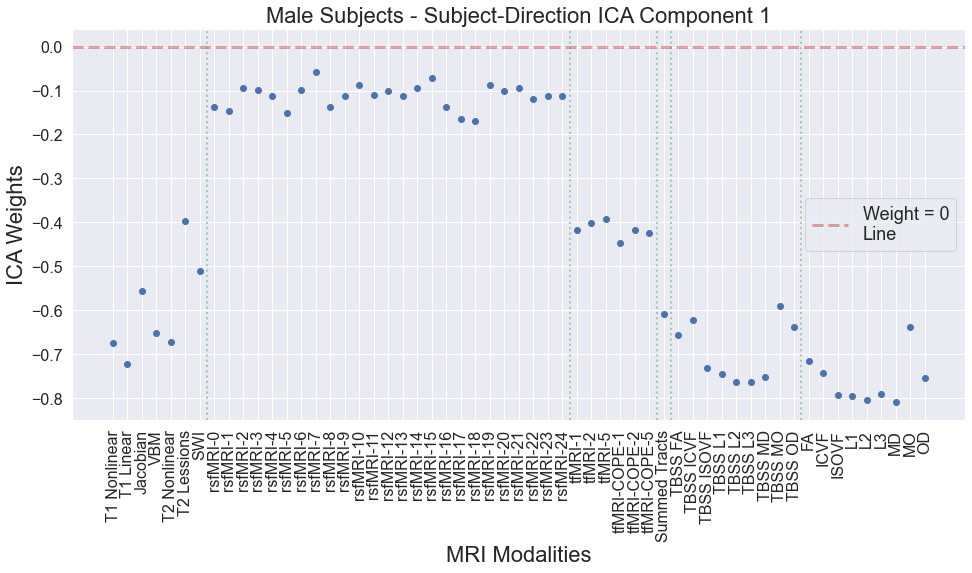

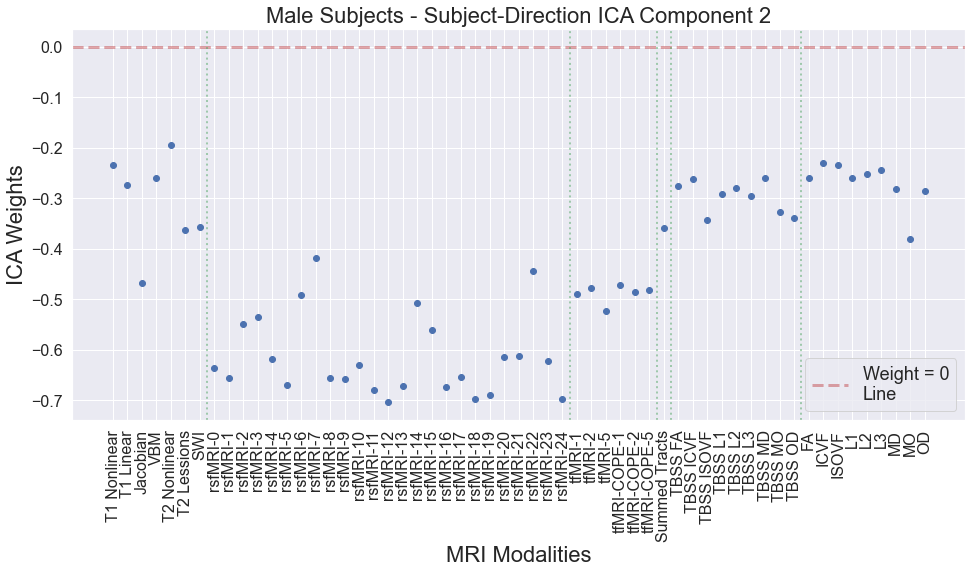

In [9]:
title_font_size=22
ticks_font_size=16
legend_font = 18
# figsize=(16, 9.6)

namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]

mat = scipy.io.loadmat(subjects_deltas)
print(mat.keys())

icaA = mat['icaA']
icaS = mat['icaS']
pcaS = mat['pcaS']
pcaU = mat['pcaU']
pcaV = mat['pcaV']
print("Shapes: ")
print("icaA", icaA.shape)
print("icaS", icaS.shape)
print("pcaS", pcaS.shape)
print("pcaU", pcaU.shape)
print("pcaV", pcaV.shape)

for i in range(pcaicaU.shape[1]):
    
    fig = plt.figure(figsize=(16, 7.2))
    
    plt.scatter(np.arange(0, pcaicaU.shape[0]), pcaicaU[:,i])
    plt.xticks(np.arange(0, pcaicaU.shape[0]), namesNN, rotation=90, fontsize= ticks_font_size);
    plt.xlabel("MRI Modalities", fontsize=title_font_size)
    plt.yticks(fontsize=ticks_font_size)
    plt.ylabel("ICA Weights", fontsize=title_font_size)
    plt.title('Male Subjects - Subject-Direction ICA Component ' + str(i+1), fontsize=title_font_size)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, linewidth=3, label='Weight = 0\nLine');
    plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.axvline(x=31.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.axvline(x=37.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.axvline(x=47.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.legend(fontsize=legend_font)
    fig.savefig('Male_ICA_Subject_Direction_weights_component_' + str(i+1) + '.png', bbox_inches='tight', facecolor='white')
    
    



In [10]:
pcaicaU.sum(axis=0)

array([-23.21347685, -25.87737843])

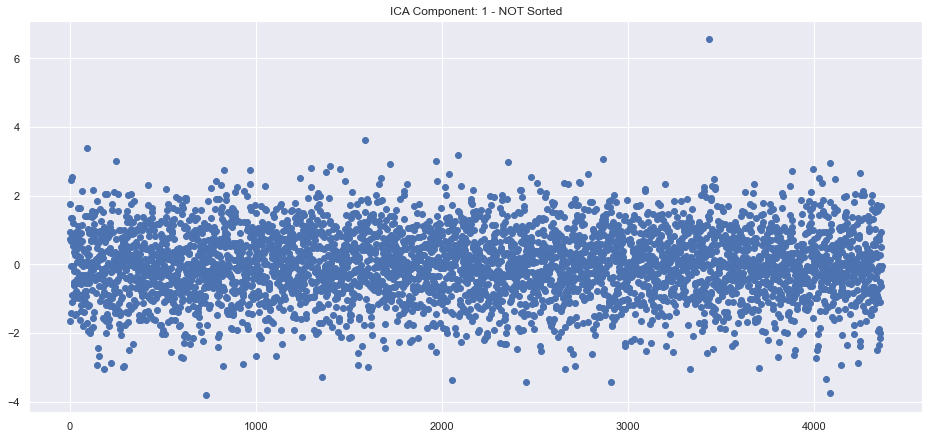

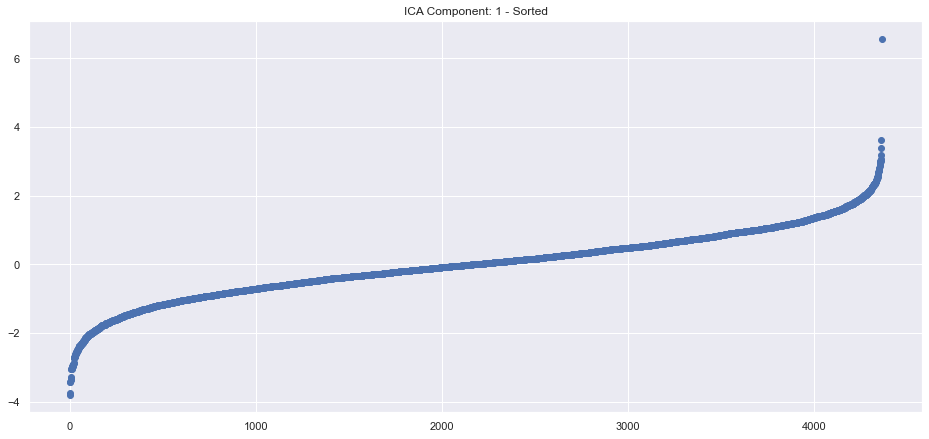

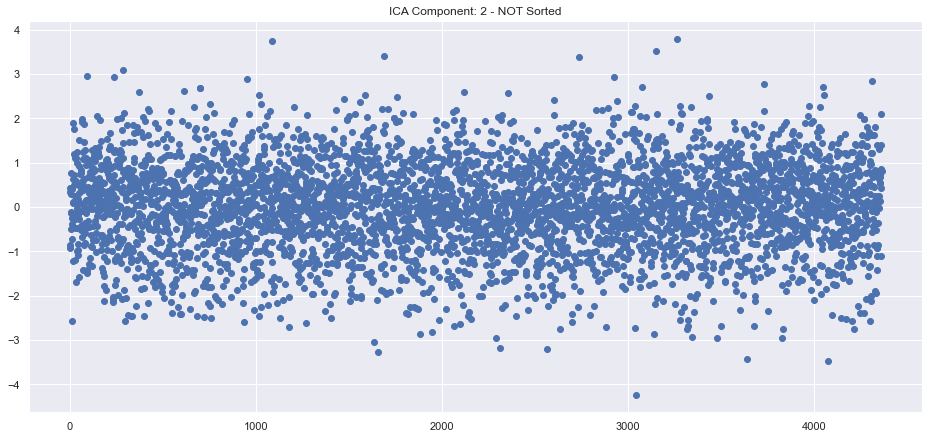

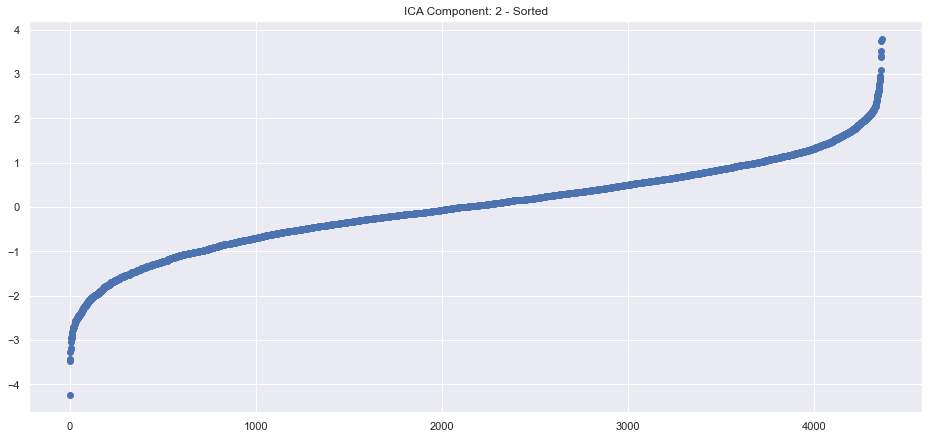

In [11]:
for i in range(icaS.shape[0]):
    plt.figure(figsize=(16, 7.2))
    plt.scatter(np.arange(0, icaS.shape[1]), icaS[i])
    plt.title('ICA Component: {} - NOT Sorted'.format(i+1))
    
    idx = np.argsort(icaS[i])
    srt = np.sort(icaS[i])
    plt.figure(figsize=(16, 7.2))
    plt.scatter(np.arange(0, icaS.shape[1]), srt)
    plt.title('ICA Component: {} - Sorted'.format(i+1))

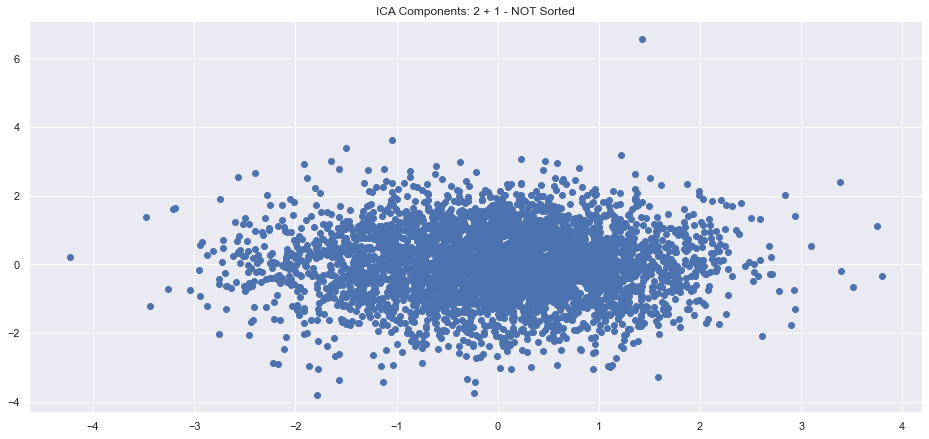

In [12]:
for i in range(icaS.shape[0]):
    for j in range(i):
        plt.figure(figsize=(16, 7.2))
        plt.scatter(icaS[i], icaS[j])
        plt.title('ICA Components: {} + {} - NOT Sorted'.format(i+1, j+1))

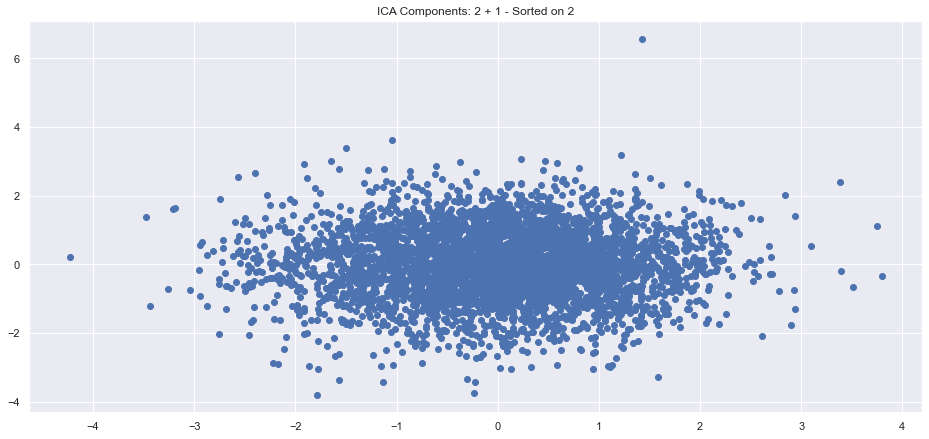

In [13]:
for i in range(icaS.shape[0]):
    for j in range(i):
        idx = np.argsort(icaS[i])
        srt = np.sort(icaS[i])
        srt2 = icaS[j]
        srt2 = srt2[idx]
        plt.figure(figsize=(16, 7.2))
        plt.scatter(srt, srt2)
        plt.title('ICA Components: {} + {} - Sorted on {}'.format(i+1, j+1, i+1))

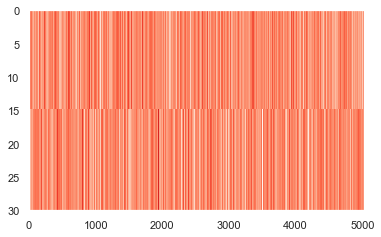

In [14]:
fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(icaS, cmap=plt.cm.Reds, interpolation='none', extent=[0,5022,30,0])
ax.set_aspect(100)
# fig.colorbar()
plt.grid(False)

In [15]:
from scipy.stats import shapiro, kurtosis

stat, p = shapiro(np.random.choice(icaS.T[:, 0], size=5000))
print(stat, -np.log10(p), p)
stat, p = shapiro(icaS.T[:, 1])
print(stat, -np.log10(p), p)

print(-np.log10(0.05))
print(-np.log10(0.167))
print(-np.log10(0.001))

print(kurtosis(icaS.T[:, 0]))
print(kurtosis(icaS.T[:, 1]))


print(icaS.T[:,0].shape)

0.995057225227356 11.305959362421445 4.9435694253474605e-12
0.9974396824836731 5.979209948509863 1.0490351769476547e-06
1.3010299956639813
0.7772835288524167
3.0
0.5883180564773967
0.19500260751294762
(4365,)


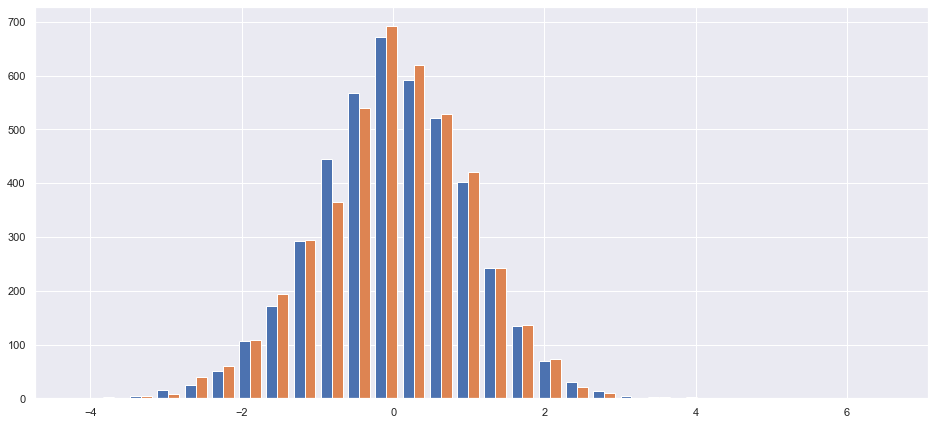

In [16]:
plt.figure(figsize=(16, 7.2))
plt.hist(icaS.T, bins=30);

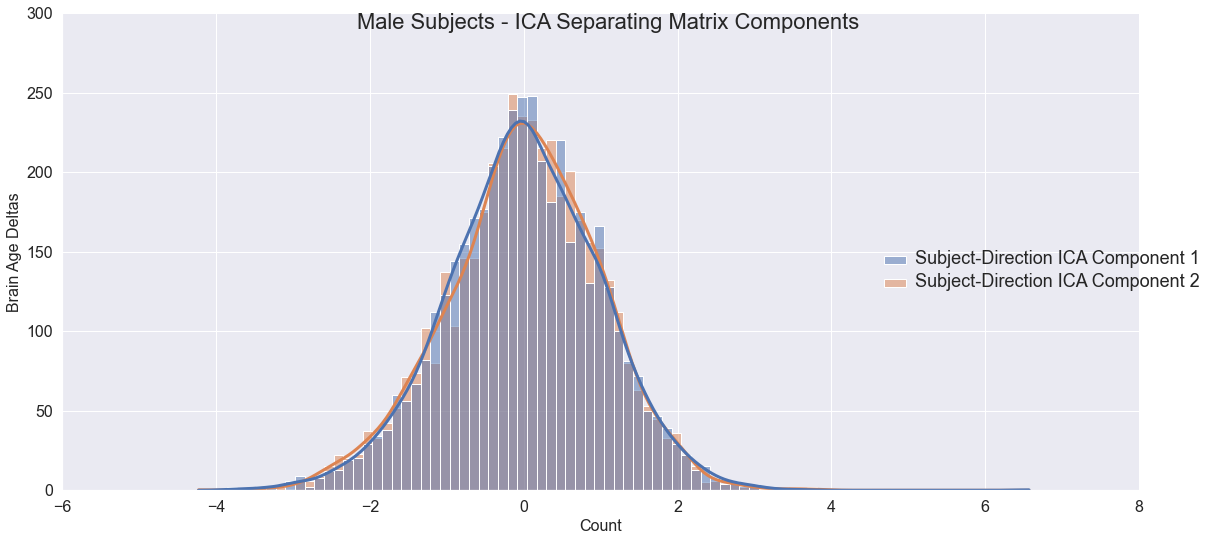

In [17]:
title_font_size=22
ticks_font_size=16
legend_font = 18

g = sns.displot(data=[icaS.T[:, 0], icaS.T[:, 1]], 
                kde=True,
                height=7.2, aspect=16/7.2,
                line_kws={'lw': 3}
               )

g.set_axis_labels('Count', 'Brain Age Deltas', fontsize=ticks_font_size)

g.set_xticklabels(size = ticks_font_size)
g.set_yticklabels(size = ticks_font_size)

g.fig.suptitle("Male Subjects - ICA Separating Matrix Components", fontsize=title_font_size)


new_labels = ['Subject-Direction ICA Component 1', 'Subject-Direction ICA Component 2']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.setp(g._legend.get_texts(), fontsize=legend_font)

# fig = g.get_figure()
g.savefig("Male_ICA_Subject_Direction_histogram.png", facecolor='white', bbox_inches='tight') 

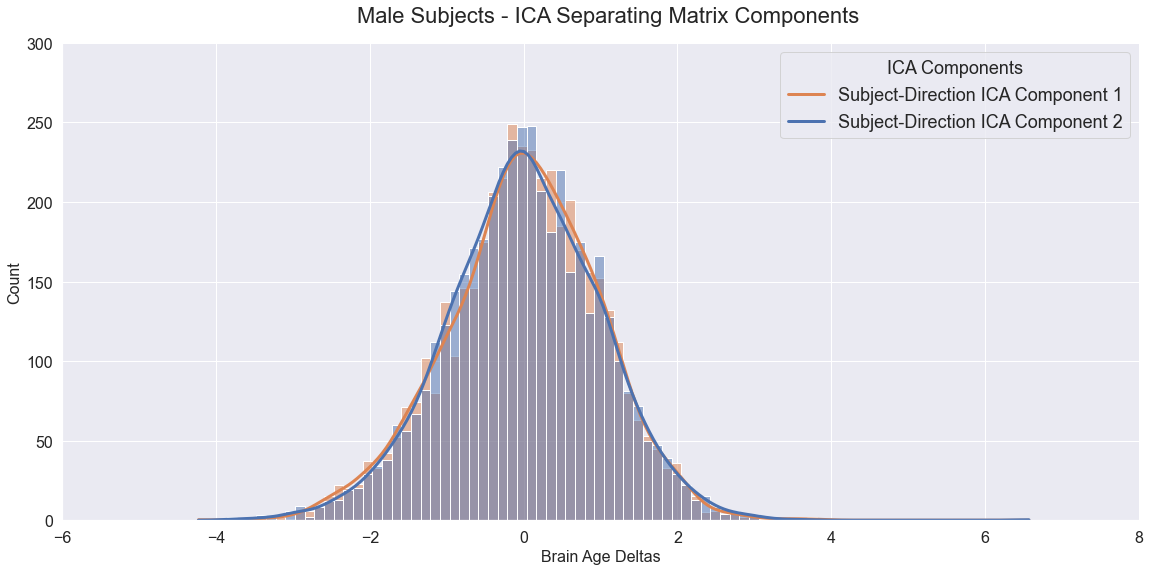

In [18]:
title_font_size=22
ticks_font_size=16
legend_font = 18

# Create the plot
g = sns.displot(data=[icaS.T[:, 0], icaS.T[:, 1]], 
                kde=True,
                height=7.2, aspect=16/7.2,
                line_kws={'lw': 3}
               )

# Set the axis labels
g.set_axis_labels('Brain Age Deltas', 'Count', fontsize=ticks_font_size)

# Set the tick label sizes
g.set_xticklabels(size = ticks_font_size)
g.set_yticklabels(size = ticks_font_size)

# Set the plot title
g.fig.suptitle("Male Subjects - ICA Separating Matrix Components", fontsize=title_font_size, y=1.05)

# Define new labels
new_labels = ['Subject-Direction ICA Component 1', 'Subject-Direction ICA Component 2']

# Remove the old legend
g._legend.remove()

# Add a new legend with custom labels
g.ax.legend(title='ICA Components', labels=new_labels, loc='upper right', fontsize=legend_font, title_fontsize=legend_font)

# Save the figure
g.savefig("Male_ICA_Subject_Direction_histogram.png", facecolor='white', bbox_inches='tight')


In [19]:
from scipy.stats import kurtosis
kurtosis(icaS.T)

array([0.58831806, 0.19500261])

In [20]:
idx = np.argsort(icaS[0])
icaS1 = np.sort(icaS[0])
icaS2 = icaS[1][idx]
# icaS2 = icaS2[idx]

print(icaS1.shape)
icaS3 = icaS[2][idx]
# icaS3 = icaS3[idx]
# icaS1 = np.stack((icaS1, icaS3), axis=1)
icaS1 = np.stack((icaS1, icaS2, icaS3), axis=1)
icaS1 = icaS1.T

fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(icaS1, cmap=plt.cm.Reds, interpolation='none', extent=[0,5022,30,0])
ax.set_aspect(100)
# fig.colorbar()
plt.grid(False)

(4365,)


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
icaS.shape

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# db = DBSCAN(eps=0.3, min_samples=10)
# yhat = db.fit_predict(icaS.T)
# clusters = np.unique(yhat)

In [19]:
# Compute DBSCAN
db = KMeans().fit(icaS.T)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(icaS.T, labels))

Estimated number of clusters: 8
Estimated number of noise points: 0
Silhouette Coefficient: 0.311


In [20]:
y_pred = db.predict(icaS.T)

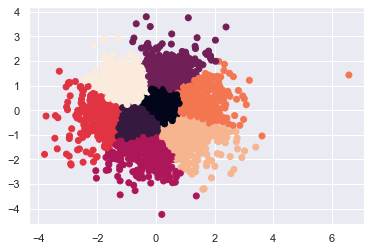

In [21]:
plt.scatter(icaS[0], icaS[1], c=y_pred)

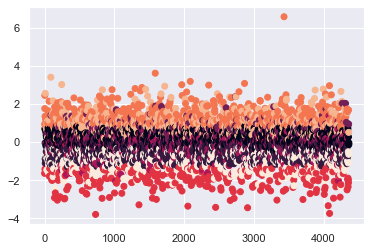

In [22]:
plt.scatter(np.arange(0, icaS.shape[1]), icaS[0], c=y_pred)

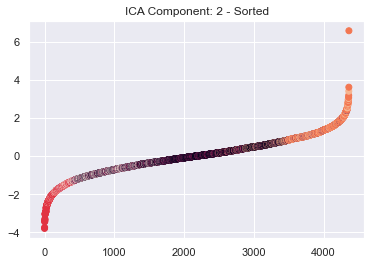

In [23]:
idx = np.argsort(icaS[0])
srt = np.sort(icaS[0])
srtc = y_pred[idx]
# plt.figure(figsize=(16, 7.2))
plt.figure()
plt.scatter(np.arange(0, icaS.shape[1]), srt, c=srtc)
plt.title('ICA Component: {} - Sorted'.format(i+1))
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

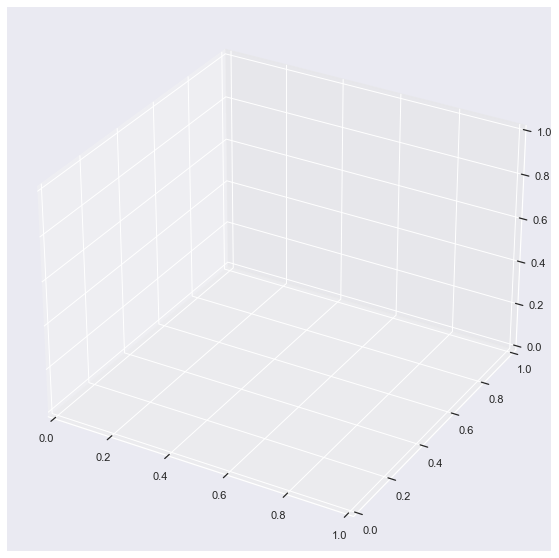

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
# ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.scatter(icaS[0], icaS[1], icaS[2], c=y_pred)
plt.show()

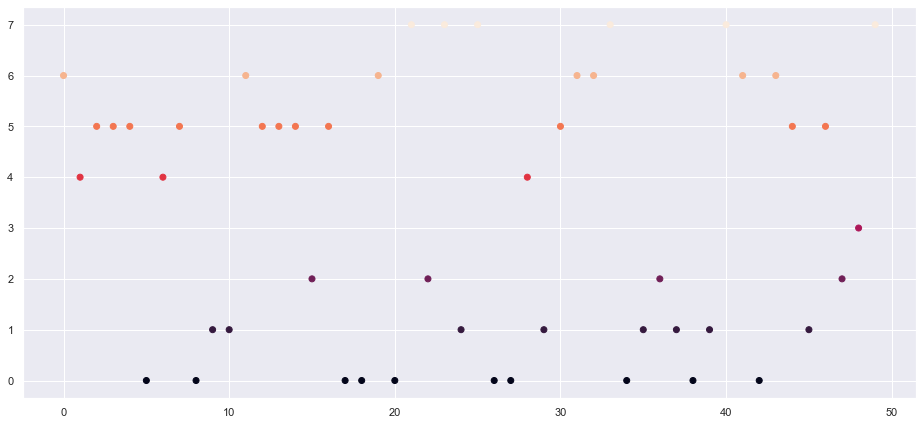

In [25]:
plt.figure(figsize=(16, 7.2))
plt.scatter(np.arange(0, y_pred[:50].shape[0]), y_pred[:50], c=y_pred[:50])

In [26]:
X = pcaicaU.dot(icaS)
print(X.shape)

(57, 4365)


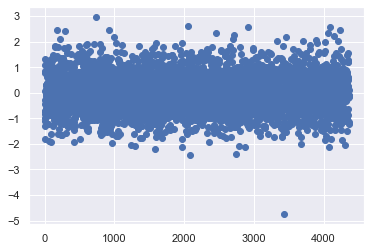

In [27]:
plt.scatter(np.arange(0, X.shape[1]), X[0])

In [28]:
u, s, vh = linalg.svd(icaS, full_matrices=False)

In [29]:
vh.shape

(2, 4365)

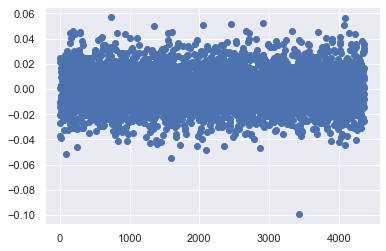

In [30]:
plt.scatter(np.arange(0, vh.shape[1]), vh[0])

In [31]:
plt.scatter(vh[0], vh[2])

IndexError: index 2 is out of bounds for axis 0 with size 2

In [32]:
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde

def scatter_plot_heatmap(x, y, xlabel, ylabel, title, equality_line=True, set_scale=False):
    
    if type(x).__module__ == np.__name__:
        pass
    else:
        x = x.to_numpy()
        
    if type(y).__module__ == np.__name__:
        pass
    else:
        y = y.to_numpy()
    
    fig = plt.figure(figsize=[7.2, 7.2])
    sns.set_style("darkgrid", {'image.cmap': u'plasma'})
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    plt.scatter(x,y,c=z,s=50)
    if equality_line == True:
        plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality
    
    X_mat=np.vstack((np.ones(len(x)), x)).T
    beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
    b,w = beta_hat[0],beta_hat[1]
    x2 = np.linspace(np.min(x),np.max(x),num=10)
    y2 = w * x2 + b
    plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')
    
    pearson_correlation = pearsonr(x,y)[0]
#     plt.text(np.max(x), np.min(y)+0.05*np.abs(np.min(y2)), 'R='+str(round(pearson_correlation,3)), horizontalalignment='right', fontsize='large')
    
    if set_scale == True:
        x_min, x_max = np.min(x), np.max(x)
        y_min, y_max = np.min(y), np.max(y)
        c_min, c_max = min(x_min, y_min), max(x_max, y_max)
        plt.xlim([c_min-2, c_max+2])
        plt.ylim([c_min-2, c_max+2])
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    lbl = 'Pearson R = '+str(round(pearson_correlation,3))
    plt.plot([],[],' ',label=lbl)
    
    plt.title(title)
    plt.legend()
    plt.show()

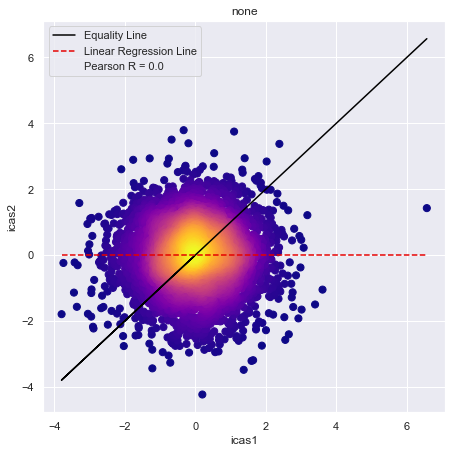

In [33]:
scatter_plot_heatmap(x=icaS[0], y=icaS[1], xlabel='icas1', ylabel='icas2', title='none')

# Analyse Subject-Direction Ages

In [34]:
# mat = scipy.io.loadmat(subjects_ages)
# print(mat.keys())

# icaA = mat['icaA']
# icaS = mat['icaS']
# pcaS = mat['pcaS']
# pcaU = mat['pcaU']
# pcaV = mat['pcaV']
# J = icaA.shape[0]
# pcaicaU = pcaU[:,:J].dot(pcaS[:J, :J]).dot(icaA)

# print("Shapes: ")
# print("icaA", icaA.shape)
# print("icaS", icaS.shape)
# print("pcaS", pcaS.shape)
# print("pcaU", pcaU.shape)
# print("pcaV", pcaV.shape)
# print("pcaicaU", pcaicaU.shape)

# for i in range(pcaicaU.shape[1]):
#     plt.figure(figsize=(16, 7.2))
#     plt.scatter(np.arange(0, pcaicaU.shape[0]), pcaicaU[:,i])
#     plt.xticks(np.arange(0, pcaicaU.shape[0]), modalities, rotation=90);
#     plt.xlabel("Modalities")
#     plt.ylabel("LR Weights")
#     plt.title('ICA Component = ' + str(i))
#     plt.axhline(y=0, color='r', linestyle='--', alpha=0.5);
#     plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5);
#     plt.axvline(x=31.5, color='g', linestyle='dotted', alpha=0.5);
#     plt.axvline(x=37.5, color='g', linestyle='dotted', alpha=0.5);
#     plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
#     plt.axvline(x=47.5, color='g', linestyle='dotted', alpha=0.5);

In [35]:
# pcaicaU

# Analyse Feature-Direction Deltas

In [12]:
mat = scipy.io.loadmat(modalities_deltas)
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'None', 'icaA', 'icaS', 'pcaS', 'pcaU', 'pcaV', '__function_workspace__'])


In [13]:
icaA = mat['icaA']
icaS = mat['icaS']
pcaS = mat['pcaS']
pcaU = mat['pcaU']
pcaV = mat['pcaV']
print("Shapes: ")
print("icaA", icaA.shape)
print("icaS", icaS.shape)
print("pcaS", pcaS.shape)
print("pcaU", pcaU.shape)
print("pcaV", pcaV.shape)

Shapes: 
icaA (50, 14)
icaS (14, 57)
pcaS (50, 50)
pcaU (4365, 50)
pcaV (57, 50)


In [14]:
J = icaA.shape[0]
pcaicaU = pcaU[:,:J].dot(pcaS[:J, :J]).dot(icaA)
print(pcaicaU.shape)

(4365, 14)


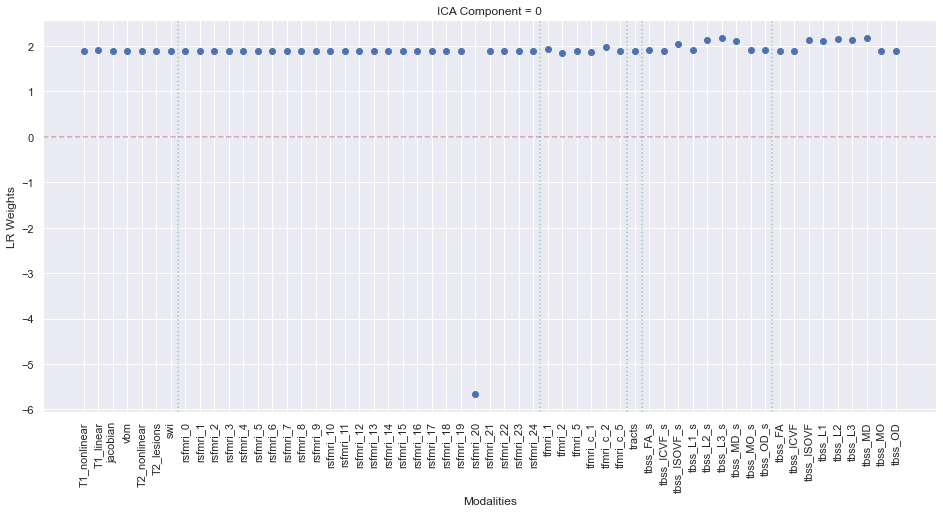

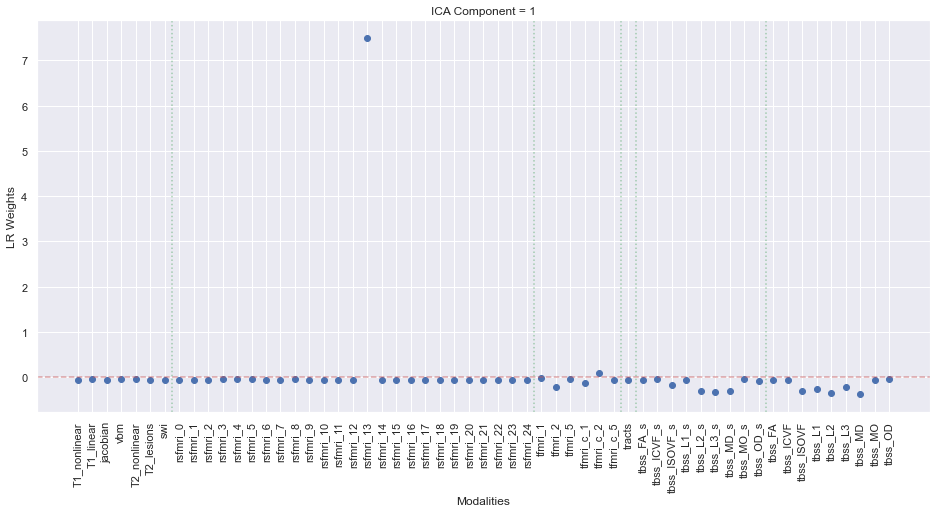

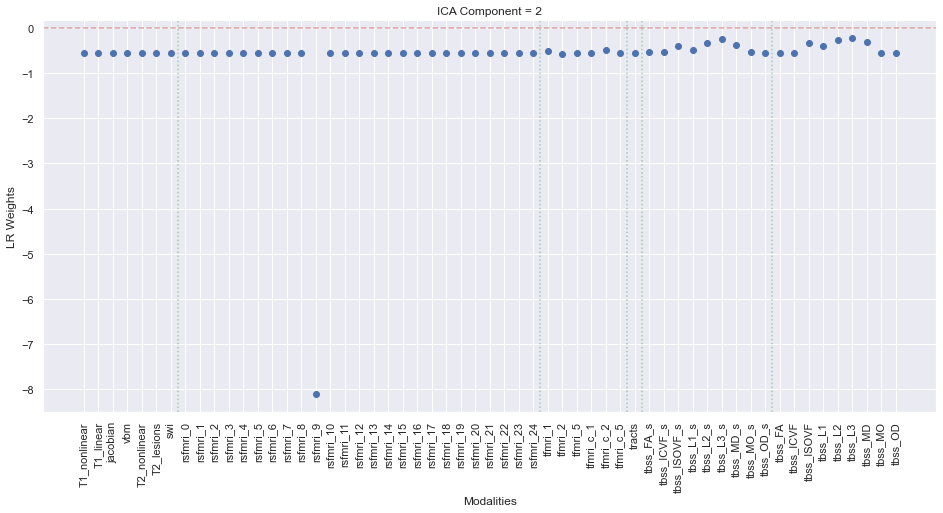

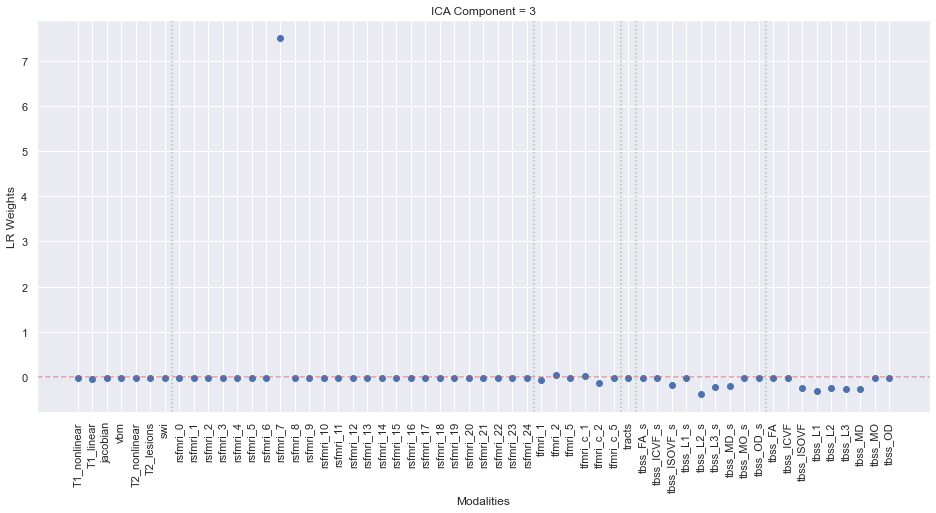

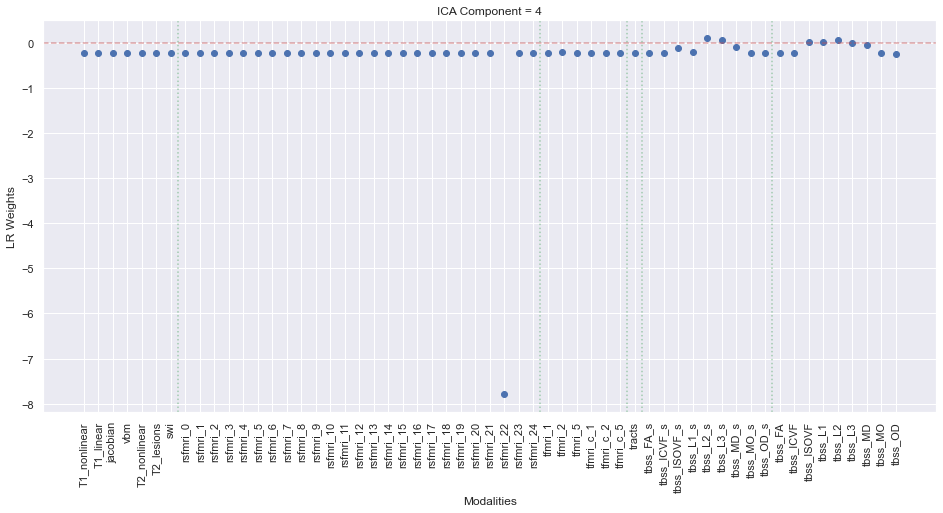

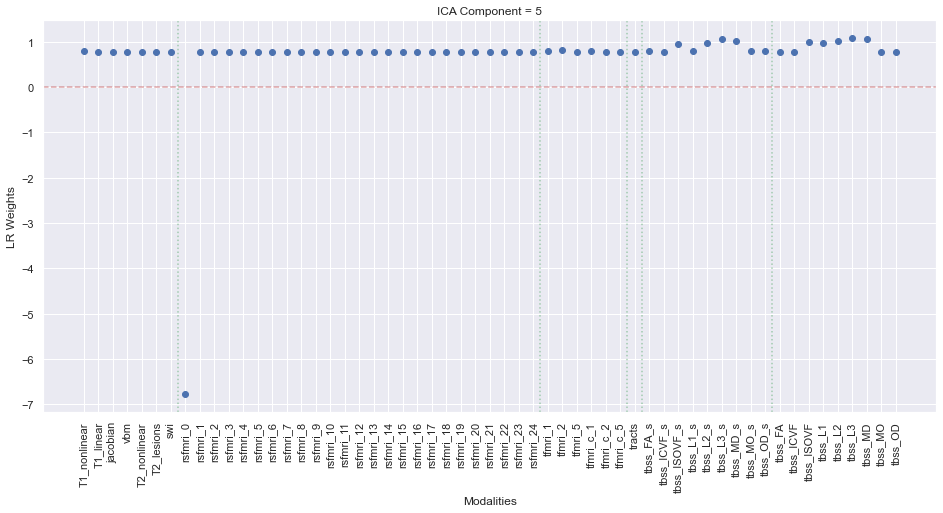

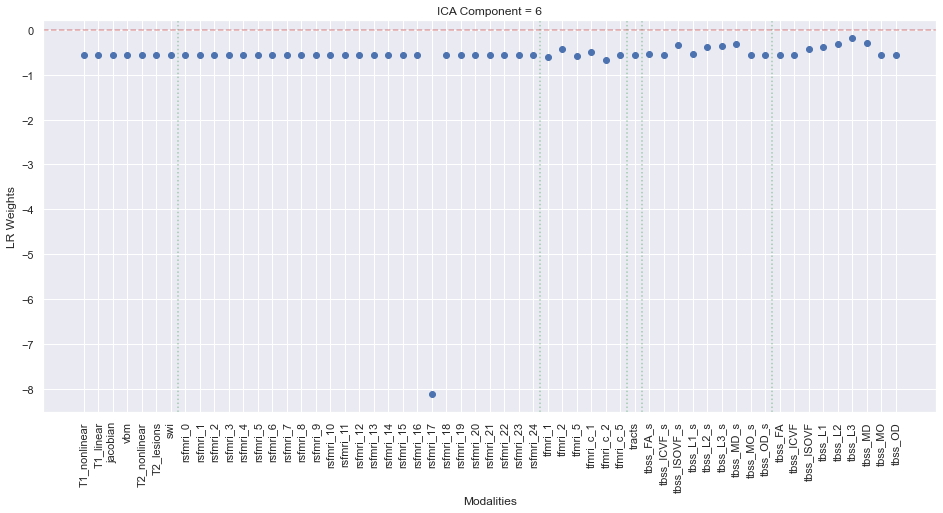

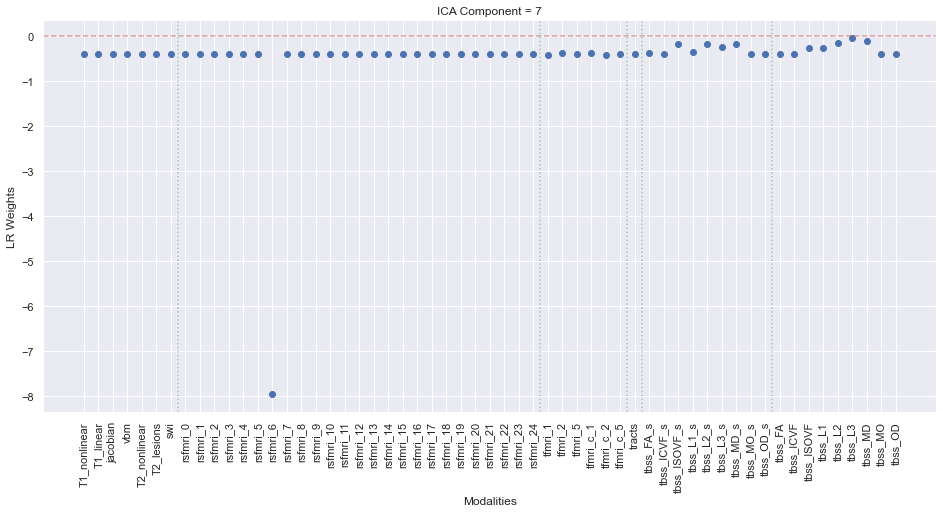

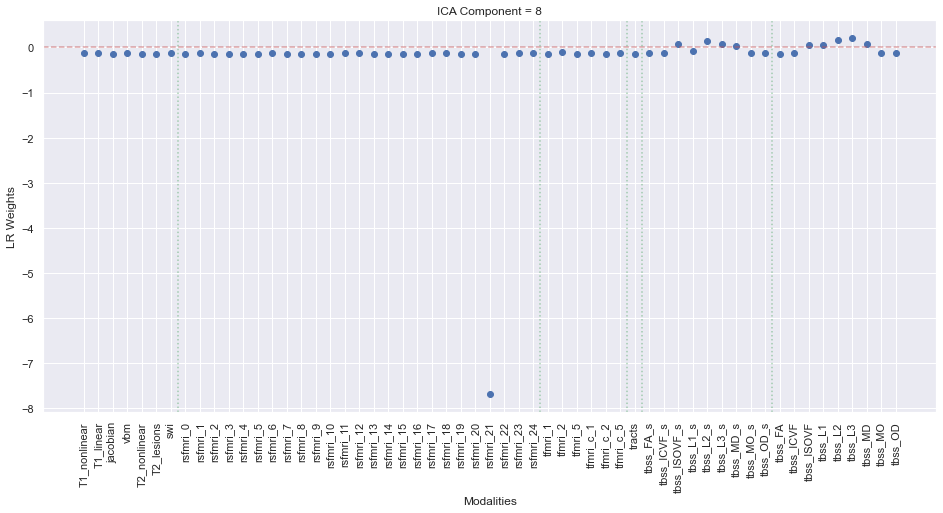

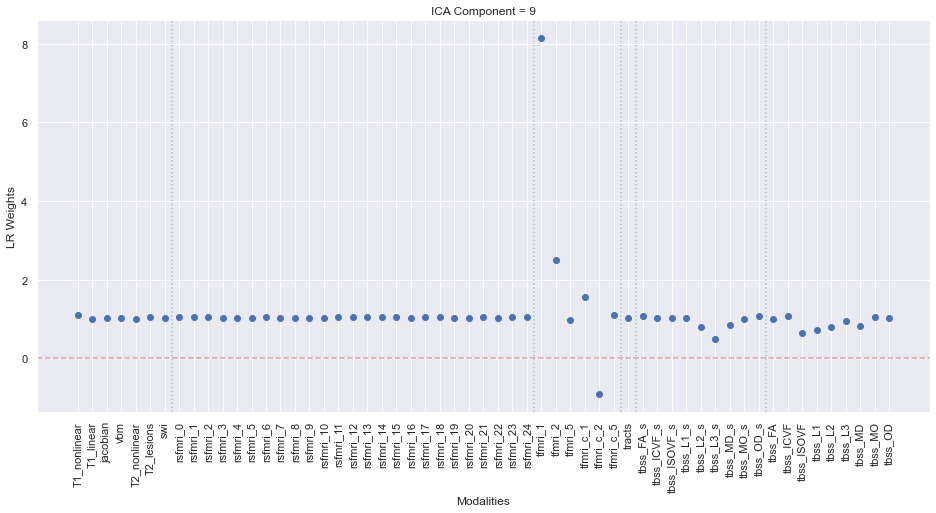

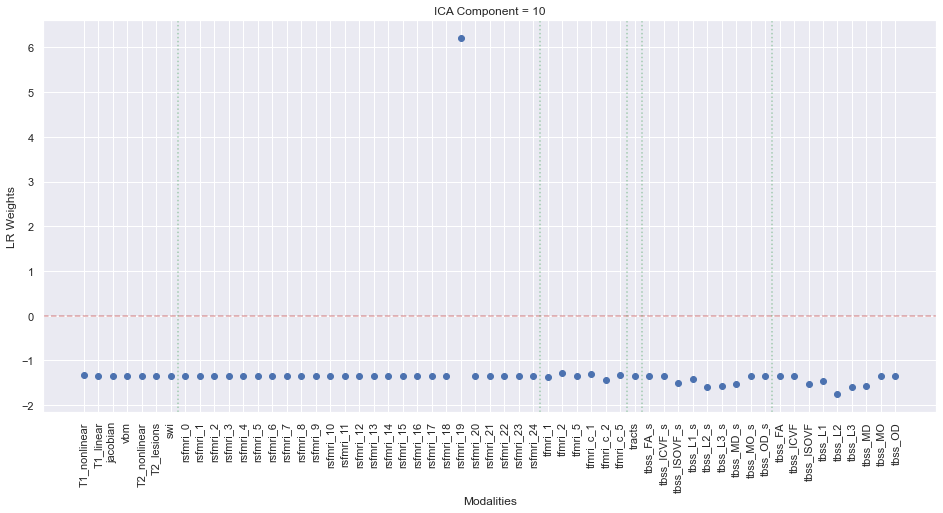

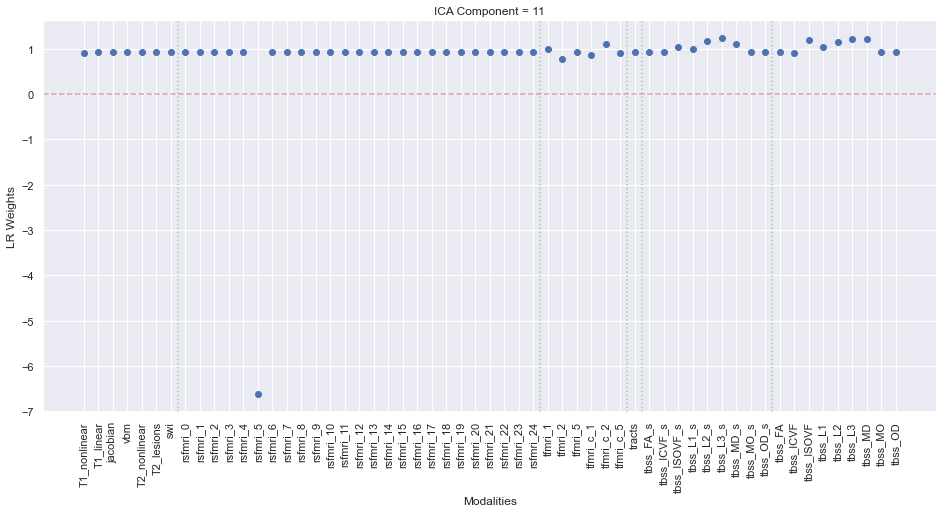

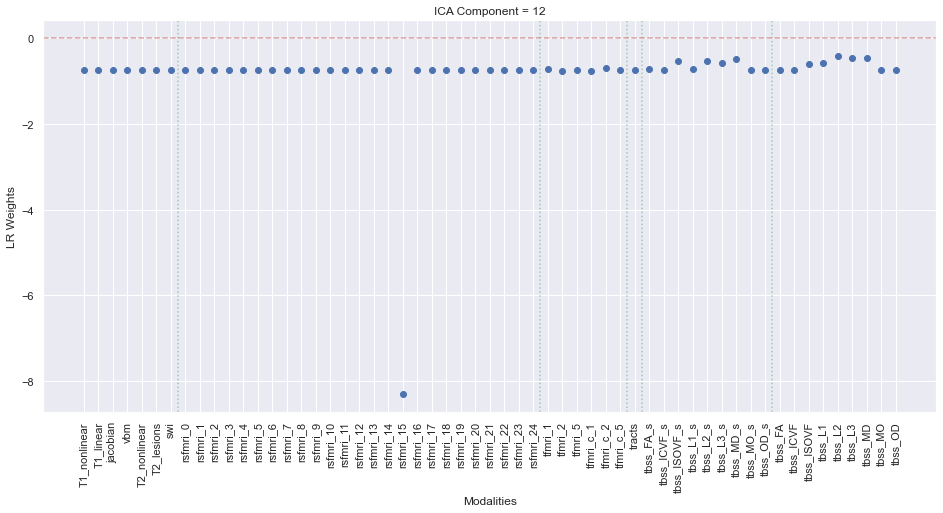

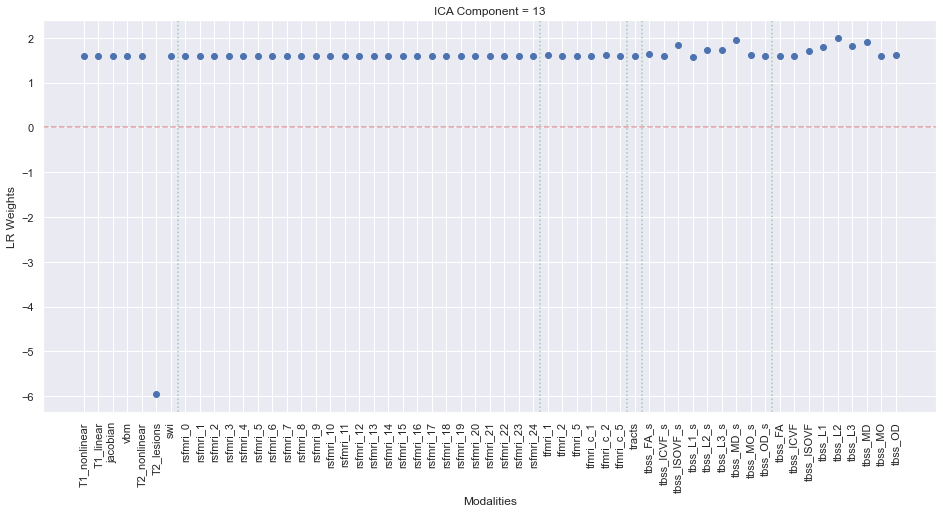

In [15]:
for i in range(pcaicaU.shape[1]):
    plt.figure(figsize=(16, 7.2))
    plt.scatter(np.arange(0, icaS.shape[1]), icaS[i])
    plt.xticks(np.arange(0, icaS.shape[1]), modalities, rotation=90);
    plt.xlabel("Modalities")
    plt.ylabel("LR Weights")
    plt.title('ICA Component = ' + str(i))
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5);
    plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5);
    plt.axvline(x=31.5, color='g', linestyle='dotted', alpha=0.5);
    plt.axvline(x=37.5, color='g', linestyle='dotted', alpha=0.5);
    plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
    plt.axvline(x=47.5, color='g', linestyle='dotted', alpha=0.5);

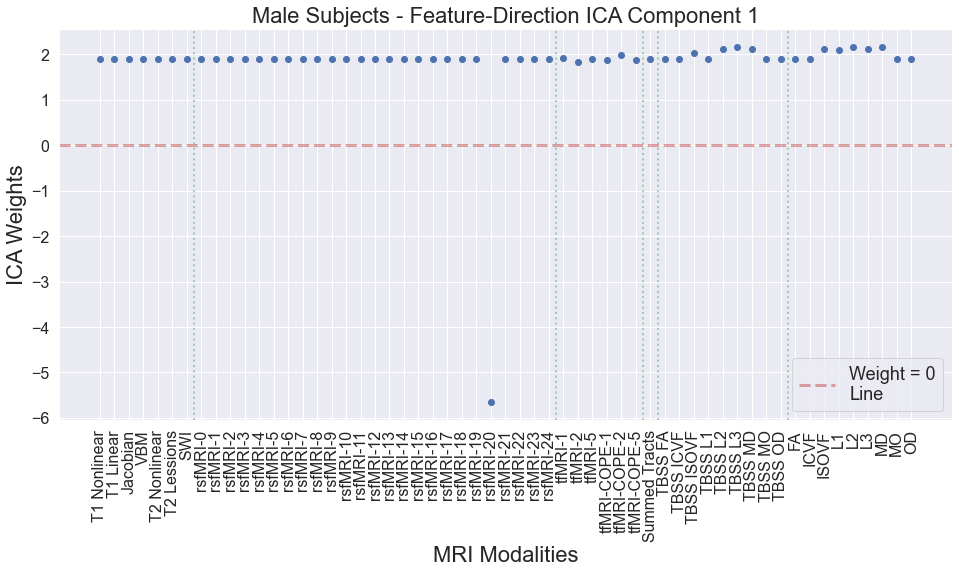

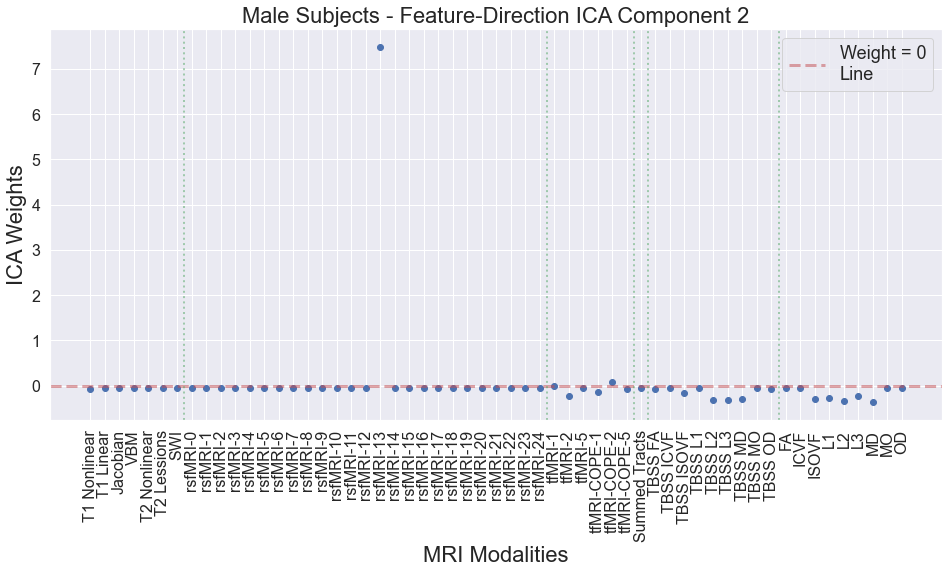

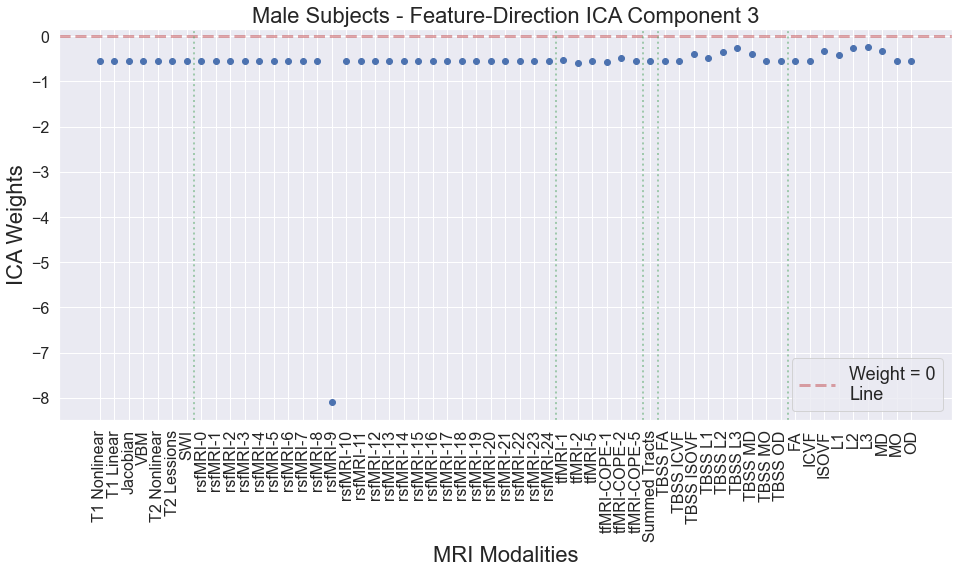

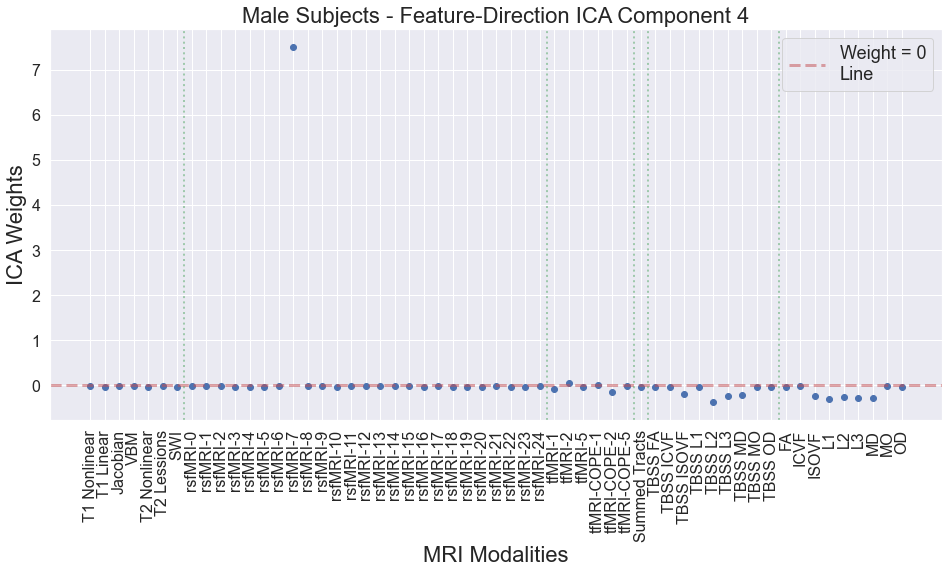

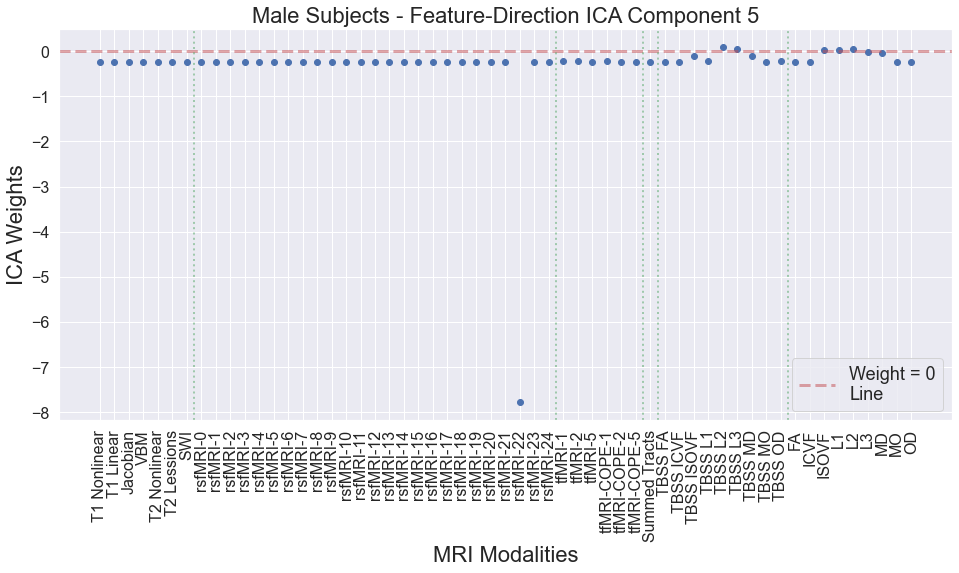

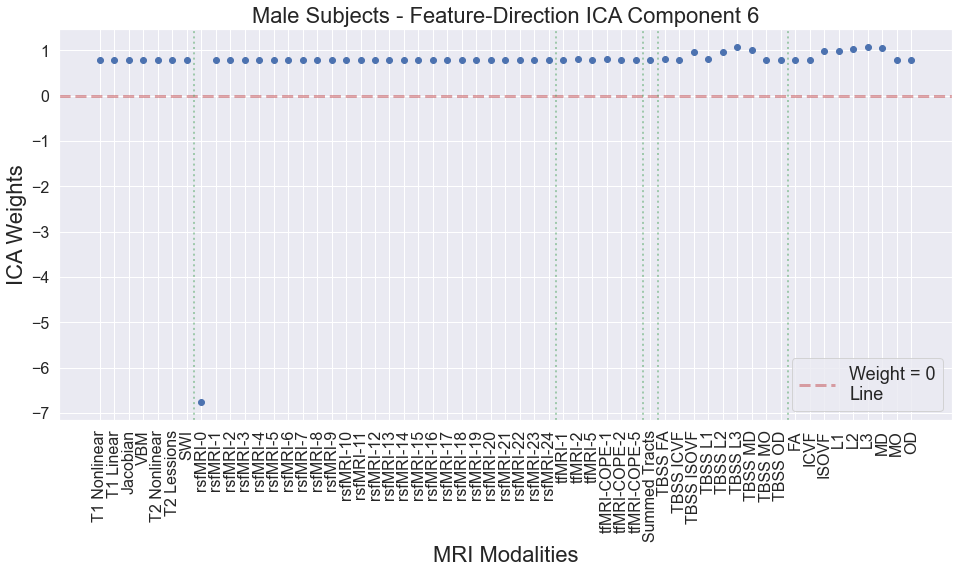

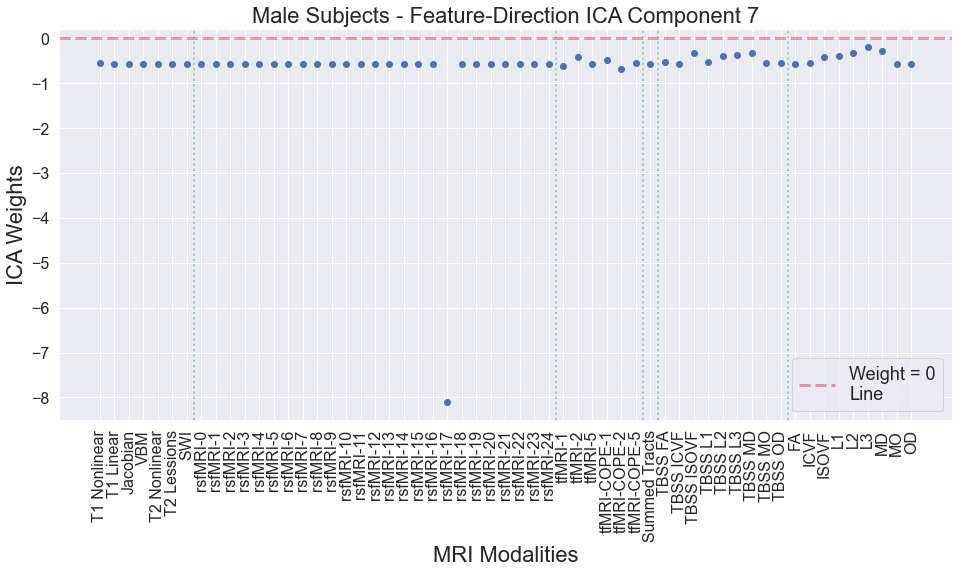

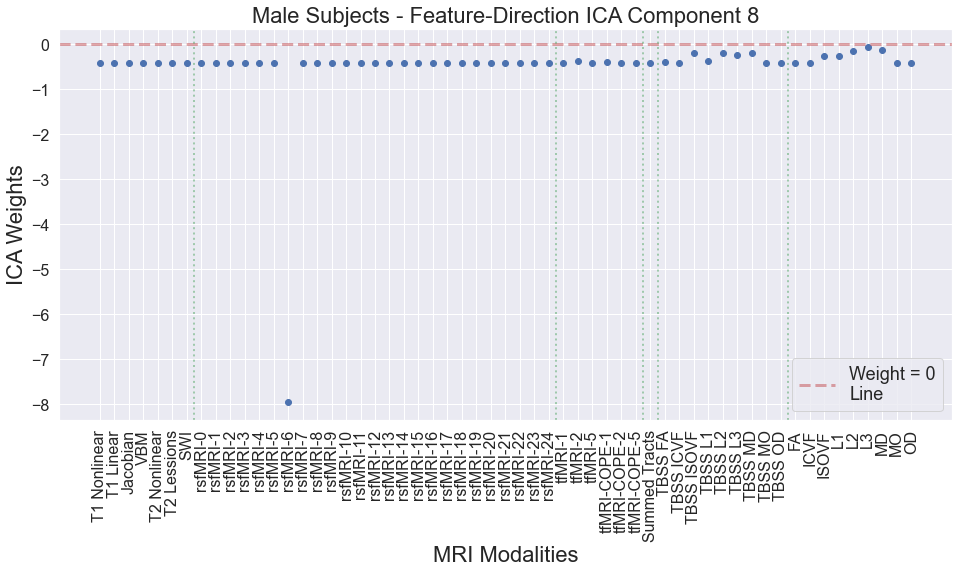

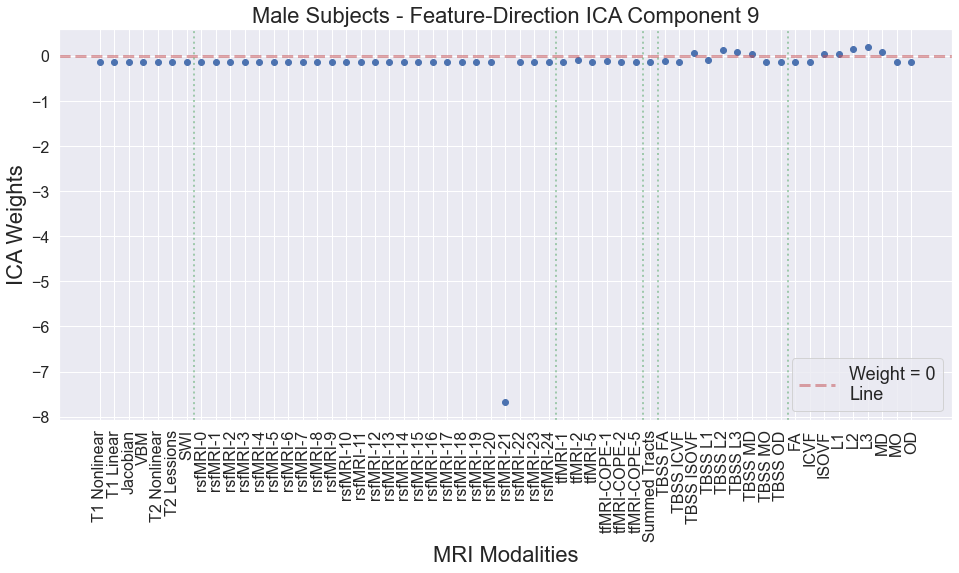

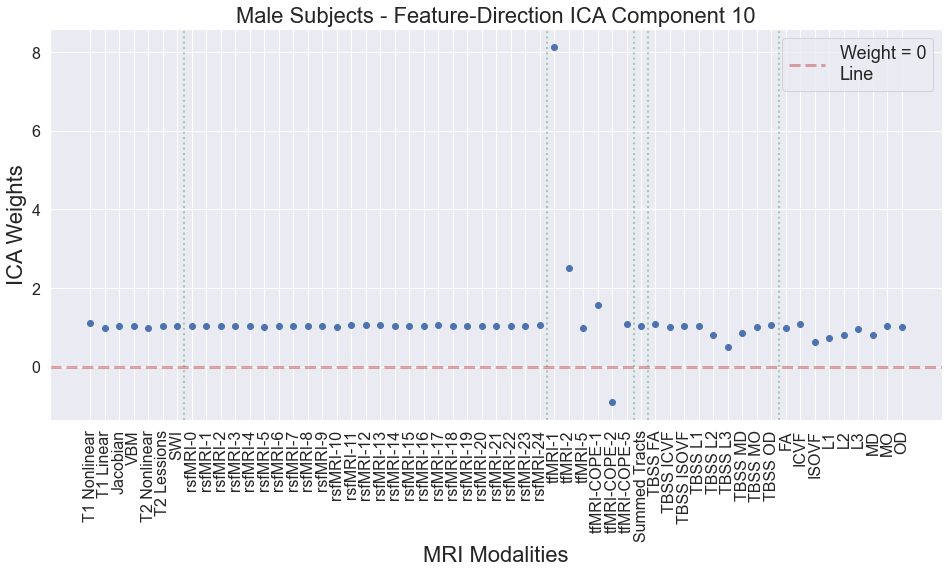

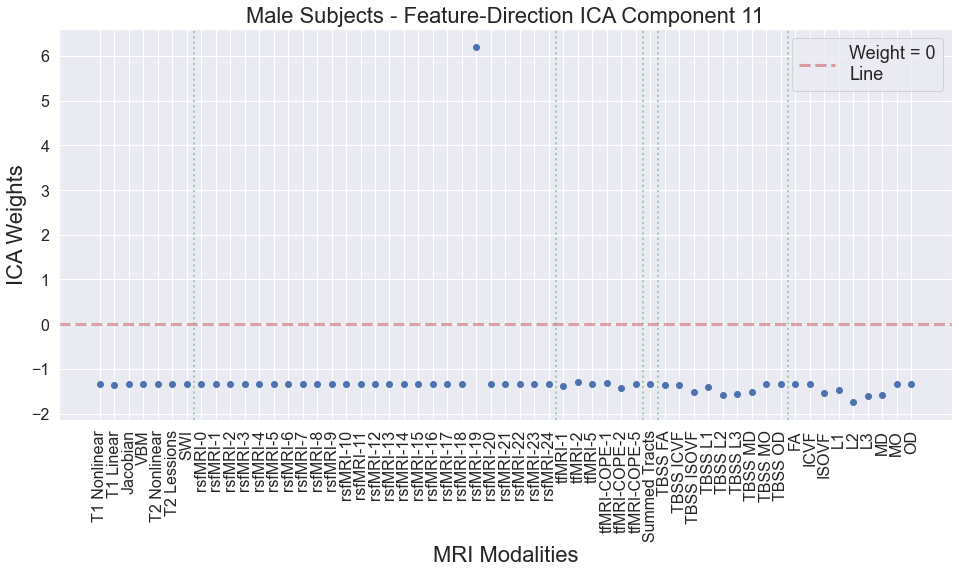

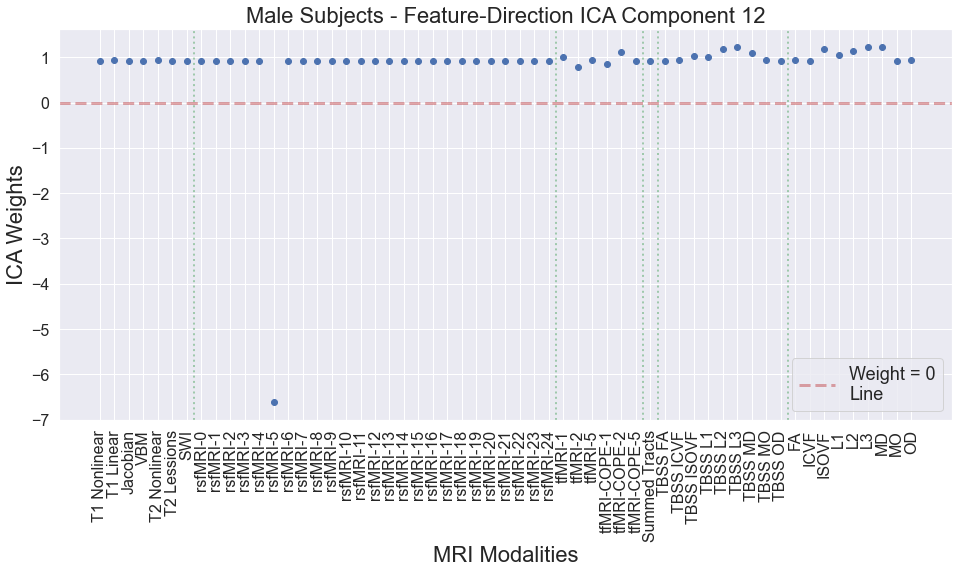

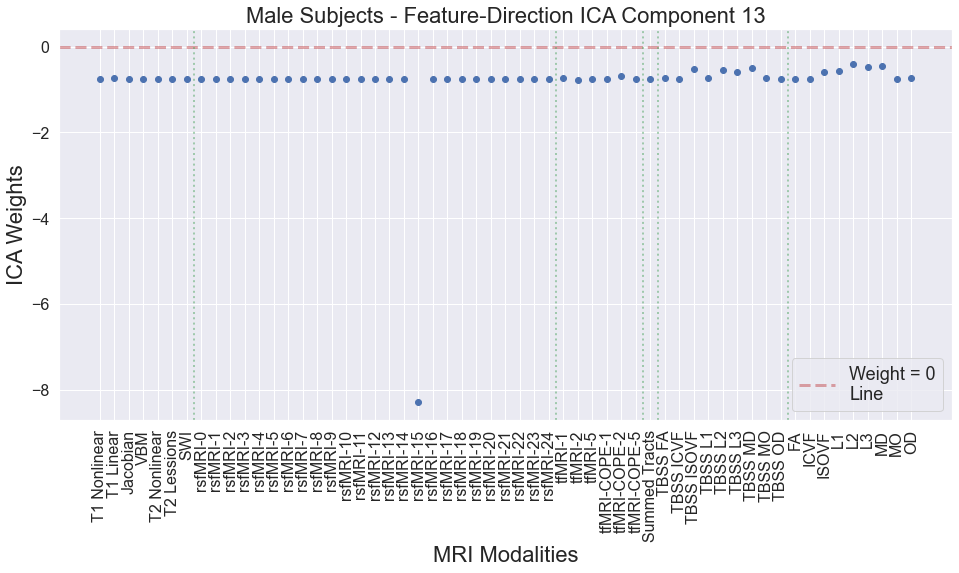

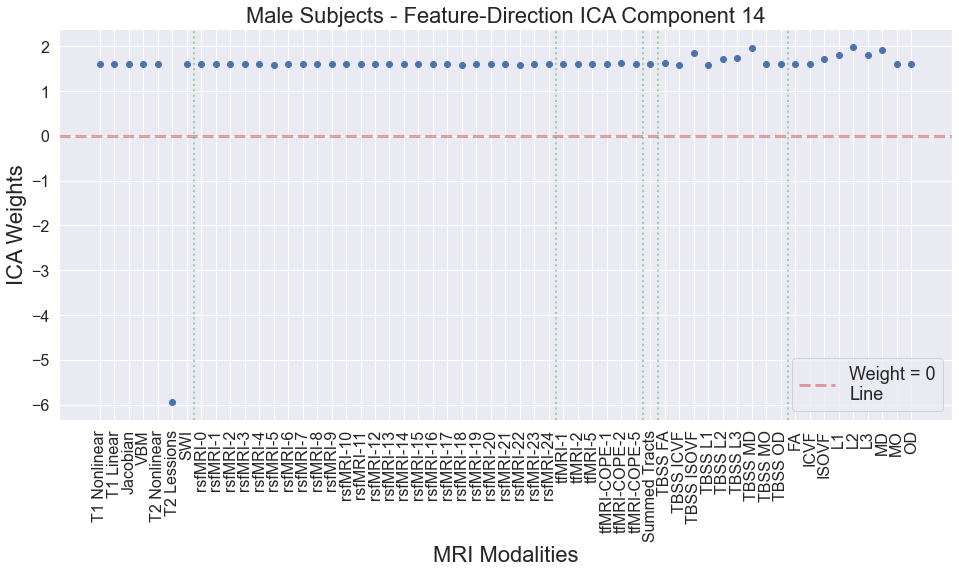

In [18]:
title_font_size=22
ticks_font_size=16
legend_font = 18
# figsize=(16, 9.6)

namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]

for i in range(pcaicaU.shape[1]):
    
    fig = plt.figure(figsize=(16, 7.2))
    
    plt.scatter(np.arange(0, icaS.shape[1]), icaS[i])
    plt.xticks(np.arange(0, icaS.shape[1]), namesNN, rotation=90, fontsize= ticks_font_size);
    plt.xlabel("MRI Modalities", fontsize=title_font_size)
    plt.yticks(fontsize=ticks_font_size)
    plt.ylabel("ICA Weights", fontsize=title_font_size)
    plt.title('Male Subjects - Feature-Direction ICA Component ' + str(i+1), fontsize=title_font_size)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, linewidth=3, label='Weight = 0\nLine');
    plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.axvline(x=31.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.axvline(x=37.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.axvline(x=47.5, color='g', linestyle='dotted', alpha=0.5, linewidth=2);
    plt.legend(fontsize=legend_font)
    fig.savefig('Male_ICA_Feature_Direction_weights_component_' + str(i+1) + '.png', bbox_inches='tight', facecolor='white')
    
    




# Analyse Feature-Direction Ages

In [ ]:
# mat = scipy.io.loadmat(modalities_ages)
# print(mat.keys())
# icaA = mat['icaA']
# icaS = mat['icaS']
# pcaS = mat['pcaS']
# pcaU = mat['pcaU']
# pcaV = mat['pcaV']
# print("Shapes: ")
# print("icaA", icaA.shape)
# print("icaS", icaS.shape)
# print("pcaS", pcaS.shape)
# print("pcaU", pcaU.shape)
# print("pcaV", pcaV.shape)

In [ ]:
# J = icaA.shape[0]
# pcaicaU = pcaU[:,:J].dot(pcaS[:J, :J]).dot(icaA)
# print(pcaicaU.shape)

In [ ]:
# for i in range(pcaicaU.shape[1]):
#     plt.figure(figsize=(16, 7.2))
#     plt.scatter(np.arange(0, icaS.shape[1]), icaS[i])
#     plt.xticks(np.arange(0, icaS.shape[1]), modalities, rotation=90);
#     plt.xlabel("Modalities")
#     plt.ylabel("LR Weights")
#     plt.title('ICA Component = ' + str(i))
#     plt.axhline(y=0, color='r', linestyle='--', alpha=0.5);
#     plt.axvline(x=6.5, color='g', linestyle='dotted', alpha=0.5);
#     plt.axvline(x=31.5, color='g', linestyle='dotted', alpha=0.5);
#     plt.axvline(x=37.5, color='g', linestyle='dotted', alpha=0.5);
#     plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
#     plt.axvline(x=47.5, color='g', linestyle='dotted', alpha=0.5);